<a href="https://colab.research.google.com/github/Martipetti/MachineLearning/blob/develop-martipetti/Modelli/Rete%20Neurale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network

In [343]:
import pandas as pd
import numpy as np
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, RMSprop
#from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from itertools import product
from sklearn.metrics import roc_curve, roc_auc_score

Download the data

In [344]:
link = 'http://tennis-data.co.uk/2023/2023.xlsx'
totalData = pd.read_excel(link)

Cleaning DataSet

In [345]:
totalData = totalData[totalData['Series'] == 'Grand Slam']

In [346]:
trainingSet = totalData[["Tournament", "Surface", "Round", "Winner", "Loser", "WRank", "LRank", "B365W", "B365L", "PSW", "PSL"]]

In [347]:
for column in trainingSet:
  trainingSet.dropna(subset=[column], inplace=True)

<ipython-input-347-ce7461797c1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet.dropna(subset=[column], inplace=True)
<ipython-input-347-ce7461797c1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet.dropna(subset=[column], inplace=True)
<ipython-input-347-ce7461797c1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet.dropna(subset=[column], inplace=True)
<ipython-input-347-ce7461797c1b>:2: Setting

In [348]:
trainingSet.reset_index(drop=True, inplace=True)
trainingSet.index = range(1, len(trainingSet) + 1)

In [349]:
nuovi_nomi_colonne = ["Tournament","Surface", "Round", "Player1", "Player2", "Rank1", "Rank2", "B1", "B2", "PS1", "PS2"]
trainingSet.columns = nuovi_nomi_colonne

In [350]:
trainingSet["target"] = 0

<ipython-input-350-60ba1f42b5c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet["target"] = 0


Mapping string to integer

In [351]:
trainingSet["Tournament"] = trainingSet["Tournament"].astype("category")
trainingSet["Surface"] = trainingSet["Surface"].astype("category")
trainingSet["Round"] = trainingSet["Round"].astype("category")
trainingSet["Player1"] = trainingSet["Player1"].astype("category")
trainingSet["Player2"] = trainingSet["Player2"].astype("category")

<ipython-input-351-1d9e29e86b61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet["Tournament"] = trainingSet["Tournament"].astype("category")
<ipython-input-351-1d9e29e86b61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet["Surface"] = trainingSet["Surface"].astype("category")
<ipython-input-351-1d9e29e86b61>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [352]:
trainingSet.dtypes

Tournament    category
Surface       category
Round         category
Player1       category
Player2       category
Rank1          float64
Rank2          float64
B1             float64
B2             float64
PS1            float64
PS2            float64
target           int64
dtype: object

In [353]:
label_encoder = LabelEncoder()
trainingSet["Tournament"] = label_encoder.fit_transform(trainingSet["Tournament"])
trainingSet["Surface"] = label_encoder.fit_transform(trainingSet["Surface"])
trainingSet["Round"] = label_encoder.fit_transform(trainingSet["Round"])

<ipython-input-353-be19e985f5d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet["Tournament"] = label_encoder.fit_transform(trainingSet["Tournament"])
<ipython-input-353-be19e985f5d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet["Surface"] = label_encoder.fit_transform(trainingSet["Surface"])
<ipython-input-353-be19e985f5d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [354]:
label_encoder = LabelEncoder()
label_encoder.fit(trainingSet["Player2"].append(trainingSet["Player1"]))
tmp_1 = label_encoder.transform(trainingSet["Player1"])
tmp_2 = label_encoder.transform(trainingSet["Player2"])
trainingSet["Player1Code"], trainingSet["Player2Code"] = tmp_1, tmp_2

<ipython-input-354-98cfb96ab1d4>:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  label_encoder.fit(trainingSet["Player2"].append(trainingSet["Player1"]))
<ipython-input-354-98cfb96ab1d4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet["Player1Code"], trainingSet["Player2Code"] = tmp_1, tmp_2
<ipython-input-354-98cfb96ab1d4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet["Player1Code"], train

Mixing the player to avoid the pattern with the winner on the first columns and the loser on the second one

In [355]:
trainingSet

,Tournament,Surface,Round,Player1,Player2,Rank1,Rank2,B1,B2,PS1,PS2,target,Player1Code,Player2Code
1,0,2,0,Moutet C.,Wu Y.,62.0,114.0,2.38,1.57,2.40,1.65,0,116,184
2,0,2,0,Watanuki Y.,Rinderknech A.,138.0,59.0,2.30,1.62,2.18,1.77,0,181,143
3,0,2,0,Van De Zandschulp B.,Ivashka I.,34.0,73.0,1.36,3.20,1.47,2.91,0,174,75
4,0,2,0,Etcheverry T.,Barrere G.,79.0,83.0,2.30,1.62,2.43,1.63,0,48,7
5,0,2,0,Sinner J.,Edmund K.,16.0,581.0,1.06,10.00,1.05,15.72,0,157,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,2,2,4,Medvedev D.,Rublev A.,3.0,8.0,1.36,3.20,1.39,3.30,0,105,145
501,2,2,4,Alcaraz C.,Zverev A.,1.0,12.0,1.20,4.50,1.22,4.90,0,1,190
502,2,2,5,Djokovic N.,Shelton B.,2.0,47.0,1.06,10.00,1.09,9.76,0,42,154
503,2,2,5,Medvedev D.,Alcaraz C.,3.0,1.0,4.33,1.22,4.13,1.28,0,105,1


In [356]:
swap_rows = trainingSet.index[::2]

df_swapped = trainingSet.loc[swap_rows]
df_swapped['Player1Code'], df_swapped['Player2Code'] = df_swapped['Player2Code'], df_swapped['Player1Code']
df_swapped['target'] = 1
df_swapped['Rank1'], df_swapped['Rank2'] = df_swapped['Rank2'], df_swapped['Rank1']
df_swapped['B1'], df_swapped['B2'] = df_swapped['B2'], df_swapped['B1']
df_swapped['PS1'], df_swapped['PS2'] = df_swapped['PS2'], df_swapped['PS1']

trainingSet = pd.concat([trainingSet.loc[~trainingSet.index.isin(swap_rows)], df_swapped])

In [357]:
trainingSet = trainingSet.drop(["Player1", "Player2"], axis=1)

Scaling and splitting the data and rename the data set

In [358]:
trainingSet = shuffle(trainingSet)

In [359]:
X_train = trainingSet[trainingSet["Tournament"] != 3]
X_test = trainingSet[trainingSet["Tournament"] == 3]

In [360]:
y_train = X_train["target"]
y_test = X_test["target"]

In [361]:
X_train = X_train.drop(columns=["target"])
X_test = X_test.drop(columns=["target"])

In [362]:
standardScaler = StandardScaler()
X_train = pd.DataFrame(standardScaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(standardScaler.fit_transform(X_test), columns = X_test.columns)

In [363]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

Creating the neural network model

In [ ]:
model = Sequential([
    Dense(units=56, input_shape=(11,), activation='relu'),
    Dense(units=112, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x=X_train, y=y_train, epochs=10, batch_size=50, verbose=1, validation_split=0.1)

Epoch 1/10
7/7 [==============================] - 1s 42ms/step - loss: 0.6898 - accuracy: 0.5251 - val_loss: 0.6421 - val_accuracy: 0.6842
Epoch 2/10
7/7 [==============================] - 0s 6ms/step - loss: 0.6075 - accuracy: 0.6549 - val_loss: 0.6111 - val_accuracy: 0.6842
Epoch 3/10
7/7 [==============================] - 0s 6ms/step - loss: 0.5660 - accuracy: 0.6932 - val_loss: 0.6065 - val_accuracy: 0.6842
Epoch 4/10
7/7 [==============================] - 0s 6ms/step - loss: 0.5419 - accuracy: 0.7080 - val_loss: 0.6104 - val_accuracy: 0.6579
Epoch 5/10
7/7 [==============================] - 0s 6ms/step - loss: 0.5283 - accuracy: 0.7021 - val_loss: 0.6198 - val_accuracy: 0.6842
Epoch 6/10
7/7 [==============================] - 0s 6ms/step - loss: 0.5159 - accuracy: 0.7168 - val_loss: 0.6215 - val_accuracy: 0.6316
Epoch 7/10
7/7 [==============================] - 0s 6ms/step - loss: 0.5062 - accuracy: 0.7286 - val_loss: 0.6301 - val_accuracy: 0.6316
Epoch 8/10
7/7 [=================

In [ ]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [23]:
def correctValue(pred):
  for i in range(pred.shape[0]):
    value = pred[i]
    if (value[0]>value[1]):
      pred[i] = [1,0]
    else:
      pred[i] = [0,1]
  return pred

In [ ]:
y_pred

array([[6.1372966e-01, 3.8627034e-01],
       [8.2163644e-01, 1.7836346e-01],
       [2.3552722e-01, 7.6447278e-01],
       [9.4997483e-01, 5.0025221e-02],
       [7.7734327e-01, 2.2265664e-01],
       [8.2501215e-01, 1.7498781e-01],
       [5.7541144e-01, 4.2458859e-01],
       [2.1187860e-01, 7.8812140e-01],
       [1.8930897e-02, 9.8106915e-01],
       [2.2020599e-01, 7.7979398e-01],
       [2.4245702e-02, 9.7575438e-01],
       [5.0404549e-01, 4.9595445e-01],
       [6.0662335e-01, 3.9337665e-01],
       [1.7406169e-01, 8.2593834e-01],
       [1.3269734e-01, 8.6730266e-01],
       [5.4932189e-01, 4.5067814e-01],
       [9.9897575e-01, 1.0242508e-03],
       [3.0048570e-04, 9.9969959e-01],
       [1.0873350e-01, 8.9126647e-01],
       [5.5716234e-01, 4.4283754e-01],
       [9.8343126e-02, 9.0165693e-01],
       [8.1809956e-01, 1.8190044e-01],
       [4.7872347e-01, 5.2127659e-01],
       [5.0445789e-01, 4.9554211e-01],
       [4.8622245e-01, 5.1377761e-01],
       [5.4348236e-01, 4.

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5019007921218872
Test accuracy: 0.6929134130477905


In [ ]:
score
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5019007921218872
Test accuracy: 0.6929134130477905


In [ ]:
y_pred

array([[6.1372966e-01, 3.8627034e-01],
       [8.2163644e-01, 1.7836346e-01],
       [2.3552722e-01, 7.6447278e-01],
       [9.4997483e-01, 5.0025221e-02],
       [7.7734327e-01, 2.2265664e-01],
       [8.2501215e-01, 1.7498781e-01],
       [5.7541144e-01, 4.2458859e-01],
       [2.1187860e-01, 7.8812140e-01],
       [1.8930897e-02, 9.8106915e-01],
       [2.2020599e-01, 7.7979398e-01],
       [2.4245702e-02, 9.7575438e-01],
       [5.0404549e-01, 4.9595445e-01],
       [6.0662335e-01, 3.9337665e-01],
       [1.7406169e-01, 8.2593834e-01],
       [1.3269734e-01, 8.6730266e-01],
       [5.4932189e-01, 4.5067814e-01],
       [9.9897575e-01, 1.0242508e-03],
       [3.0048570e-04, 9.9969959e-01],
       [1.0873350e-01, 8.9126647e-01],
       [5.5716234e-01, 4.4283754e-01],
       [9.8343126e-02, 9.0165693e-01],
       [8.1809956e-01, 1.8190044e-01],
       [4.7872347e-01, 5.2127659e-01],
       [5.0445789e-01, 4.9554211e-01],
       [4.8622245e-01, 5.1377761e-01],
       [5.4348236e-01, 4.

In [ ]:
y_pred = correctValue(y_pred)

In [34]:
y_test_first = np.array([tmp[0] for tmp in y_test])

In [ ]:
y_pred_first = np.array([tmp[0] for tmp in y_pred])

In [364]:
def firstValue(pred):
  return np.array([tmp[0] for tmp in pred])

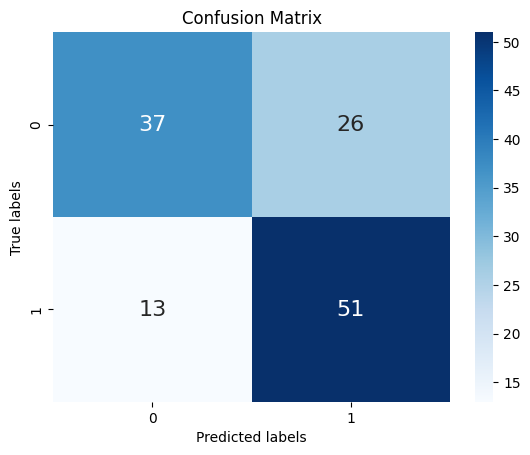

In [ ]:
conf_matrix = confusion_matrix(y_test_first, y_pred_first, labels=None, sample_weight=None)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
'''
# Define the neural network model
def create_model(optimizer='adam', loss='binary_crossentropy', firstLayer=11, secondLayer=11, learning_rate=0.1):
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError("Invalid optimizer")

    model = Sequential()
    model.add(Dense(firstLayer, input_dim=11, activation='relu'))
    model.add(Dense(secondLayer, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
    return model


# Define the hyperparameter grid
param_grid = {#'batch_size': [10, 20, 40, 50],
              'batch_size': [10, 20, 30],
              #'epochs': [ 20, 40, 50],
              'epochs': [10, 20, 30],
              'optimizer': ['adam', 'rmsprop'],
              #'loss': ['binary_crossentropy','categorical_crossentropy', 'hinge'],
              'loss': ['categorical_crossentropy'],
              'firstLayer': [11, 22, 50, 100],
              'secondLayer': [11, 22, 50, 100],
              'learning_rate': [0.001, 0.01, 0.1]}


# Initialize the best accuracy and the best hyperparameters
best_accuracy = 0
best_params = {}

# Loop over the hyperparameter grid
for params in product(*param_grid.values()):
    # Create the neural network model with the current hyperparameters
    model = create_model(params[2], params[3], params[4], params[5], params[6])

    # Train the model
    model.fit(X_train, y_train, batch_size=params[0], epochs=params[1], verbose=0)

    # Evaluate the model on the testing set
    y_pred = model.predict(X_test)
    y_pred = correctValue(y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    print("Hyperparameters: ", best_params)
    print("Accuracy: ", best_accuracy)
    print("------------------------------------------------")

    # Update the best accuracy and the best hyperparameters
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

# Print the best hyperparameters
print("Best hyperparameters: ", best_params)
print("Best accuracy: ", best_accuracy)
'''

'\n# Define the neural network model\ndef create_model(optimizer=\'adam\', loss=\'binary_crossentropy\', firstLayer=11, secondLayer=11, learning_rate=0.1):\n    if optimizer == \'adam\':\n        opt = Adam(learning_rate=learning_rate)\n    elif optimizer == \'rmsprop\':\n        opt = RMSprop(learning_rate=learning_rate)\n    else:\n        raise ValueError("Invalid optimizer")\n\n    model = Sequential()\n    model.add(Dense(firstLayer, input_dim=11, activation=\'relu\'))\n    model.add(Dense(secondLayer, activation=\'relu\'))\n    model.add(Dense(2, activation=\'softmax\'))\n    model.compile(loss=loss, optimizer=opt, metrics=[\'accuracy\'])\n    return model\n\n\n# Define the hyperparameter grid\nparam_grid = {#\'batch_size\': [10, 20, 40, 50],\n              \'batch_size\': [10, 20, 30],\n              #\'epochs\': [ 20, 40, 50],\n              \'epochs\': [10, 20, 30],\n              \'optimizer\': [\'adam\', \'rmsprop\'],\n              #\'loss\': [\'binary_crossentropy\',\'cate

In [422]:
def create_model(optimizer='adam', loss='binary_crossentropy', firstLayer=11, secondLayer=11, thirdLayer=11, learning_rate=0.1, fourthLayer=0):
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError("Invalid optimizer")

    model = Sequential()
    model.add(Dense(firstLayer, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(secondLayer, activation='relu'))
    if(params == 1):
      model.add(Dense(thirdLayer, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
    return model

param_grid = {
              'batch_size': [10, 15, 20, 25, 30],
              'epochs': [10, 15, 20, 25, 30],
              'optimizer': ['adam'],
              'loss': ["binary_crossentropy"],
              'firstLayer': [55],
              'secondLayer': [22],
              "thirdLayer": [12, 22],
              'learning_rate': [0.01],
              "fourthLayer": [0, 1]}

best_accuracy = 0
best_params = {}
best_model = None

for params in product(*param_grid.values()):

  model = create_model(params[2], params[3], params[4], params[5], params[6], params[7])

  model.fit(X_train, y_train, batch_size=params[0], epochs=params[1], verbose=0)

  y_pred = model.predict(X_test)
  y_pred = correctValue(y_pred)
  accuracy = accuracy_score(y_test, y_pred)

  print("Hyperparameters: ", params)
  print("Accuracy: ", accuracy)
  print("------------------------------------------------")

  if accuracy > best_accuracy:
      best_accuracy = accuracy
      best_params = params
      best_model = model

print("Best hyperparameters: ", best_params)
print("Best accuracy: ", best_accuracy)

4/4 [==============================] - 0s 4ms/step
Hyperparameters:  (10, 10, 'adam', 'binary_crossentropy', 55, 22, 12, 0.01, 0)
Accuracy:  0.6771653543307087
------------------------------------------------
4/4 [==============================] - 0s 5ms/step
Hyperparameters:  (10, 10, 'adam', 'binary_crossentropy', 55, 22, 12, 0.01, 1)
Accuracy:  0.7244094488188977
------------------------------------------------
4/4 [==============================] - 0s 4ms/step
Hyperparameters:  (10, 10, 'adam', 'binary_crossentropy', 55, 22, 22, 0.01, 0)
Accuracy:  0.7165354330708661
------------------------------------------------
4/4 [==============================] - 0s 4ms/step
Hyperparameters:  (10, 10, 'adam', 'binary_crossentropy', 55, 22, 22, 0.01, 1)
Accuracy:  0.7007874015748031
------------------------------------------------
4/4 [==============================] - 0s 3ms/step
Hyperparameters:  (10, 15, 'adam', 'binary_crossentropy', 55, 22, 12, 0.01, 0)
Accuracy:  0.7086614173228346
----

In [ ]:
y_test_first = firstValue(y_test)
y_pred_first = firstValue(y_pred)

In [415]:
model = Sequential()
model.add(Dense(55, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(22, activation='relu'))
#model.add(Dense(22, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.01), metrics='accuracy')

In [430]:
best_model.fit(X_train, y_train, batch_size=15, epochs=15, verbose=1)

Epoch 1/15
26/26 [==============================] - 0s 3ms/step - loss: 0.2144 - accuracy: 0.9072
Epoch 2/15
26/26 [==============================] - 0s 3ms/step - loss: 0.2411 - accuracy: 0.8966
Epoch 3/15
26/26 [==============================] - 0s 3ms/step - loss: 0.2165 - accuracy: 0.8939
Epoch 4/15
26/26 [==============================] - 0s 3ms/step - loss: 0.1972 - accuracy: 0.9151
Epoch 5/15
26/26 [==============================] - 0s 3ms/step - loss: 0.1835 - accuracy: 0.9390
Epoch 6/15
26/26 [==============================] - 0s 3ms/step - loss: 0.1924 - accuracy: 0.9284
Epoch 7/15
26/26 [==============================] - 0s 3ms/step - loss: 0.1991 - accuracy: 0.9204
Epoch 8/15
26/26 [==============================] - 0s 4ms/step - loss: 0.2404 - accuracy: 0.9072
Epoch 9/15
26/26 [==============================] - 0s 4ms/step - loss: 0.2082 - accuracy: 0.9045
Epoch 10/15
26/26 [==============================] - 0s 3ms/step - loss: 0.1813 - accuracy: 0.9231
Epoch 11/15
26/26 [

In [431]:
y_pred = best_model.predict(X_test)
y_pred = correctValue(y_pred)
y_pred_first = firstValue(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

4/4 [==============================] - 0s 6ms/step
Accuracy:  0.6692913385826772


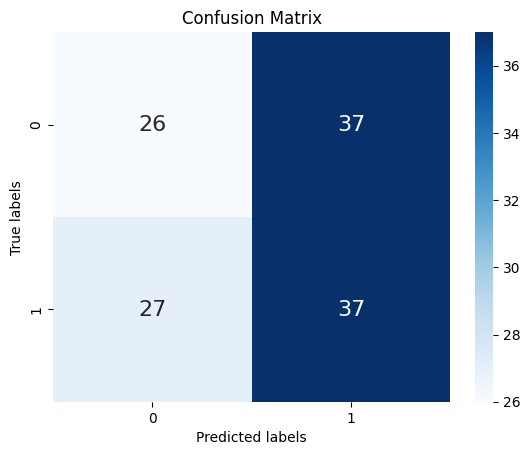

In [432]:
conf_matrix = confusion_matrix(y_test_first, y_pred_first, labels=None, sample_weight=None)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

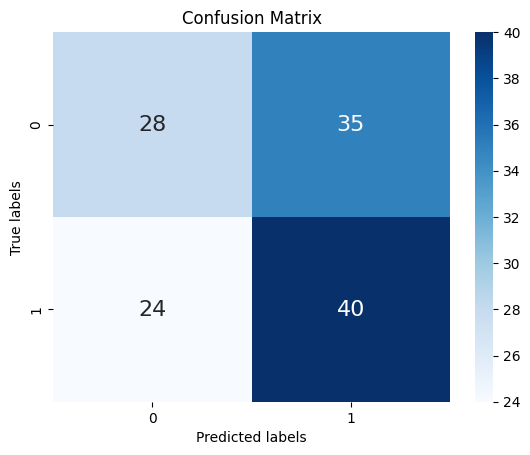

In [392]:
conf_matrix = confusion_matrix(y_test_first, y_pred_first, labels=None, sample_weight=None)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [433]:
model = Sequential()
model.add(Dense(32, input_dim=11, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [437]:
model.fit(X_train, y_train, batch_size=30, epochs=20, verbose=1)

Epoch 1/20
13/13 [==============================] - 0s 4ms/step - loss: 0.4974 - accuracy: 0.7427
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4958 - accuracy: 0.7507
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4955 - accuracy: 0.7507
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4934 - accuracy: 0.7507
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4916 - accuracy: 0.7560
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4905 - accuracy: 0.7613
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4890 - accuracy: 0.7613
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4884 - accuracy: 0.7586
Epoch 9/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4872 - accuracy: 0.7586
Epoch 10/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4860 - accuracy: 0.7560
Epoch 11/20
13/13 [

In [438]:
y_pred = model.predict(X_test)
y_pred = correctValue(y_pred)
y_pred_first = firstValue(y_pred)

4/4 [==============================] - 0s 3ms/step


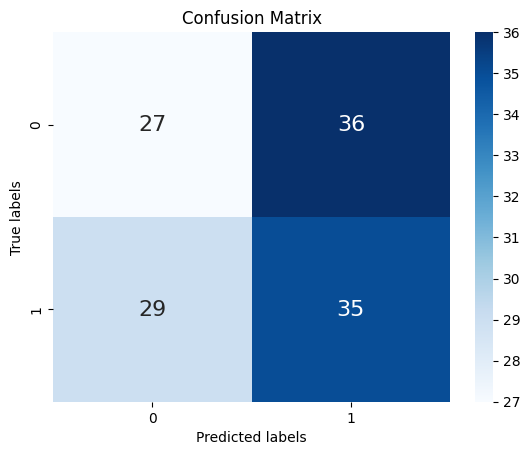

In [439]:
conf_matrix = confusion_matrix(y_test_first, y_pred_first, labels=None, sample_weight=None)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

tuning parametri

In [ ]:
def create_model(optimizer='adam', init='glorot_uniform'):
    model = Sequential()
    model.add(Dense(10, input_dim=11, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [ ]:
optimizers = ['adam', 'rmsprop']
init_methods = ['glorot_uniform', 'he_normal', 'lecun_uniform']
param_grid = dict(optimizer=optimizers, init=init_methods)

In [ ]:
model = KerasClassifier(build_fn=create_model, verbose=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
grid_result = grid.fit(X_train, y_train)

NameError: name 'KerasClassifier' is not defined

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.param_grid
for mean, std, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, std, param))

Grid search

In [ ]:
# Funzione per creare il modello
def create_model(optimizer='adam', activation='relu', neurons=10):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(2, activation='Softmax'))  # Per problemi di classificazione binaria
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Creare il modello KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Definire il parametro della griglia
param_grid = {
    'batch_size': [10, 20, 30],
    'epochs': [10, 20, 30],
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'neurons': [11, 50, 100]
}

# Definire la grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')

# Addestrare la grid search sui dati di addestramento
grid_result = grid_search.fit(X_train, y_train)

# Stampare i risultati
print("Migliori parametri:", grid_result.best_params_)
print("Accuratezza migliore combinazione:", grid_result.best_score_)

ROC

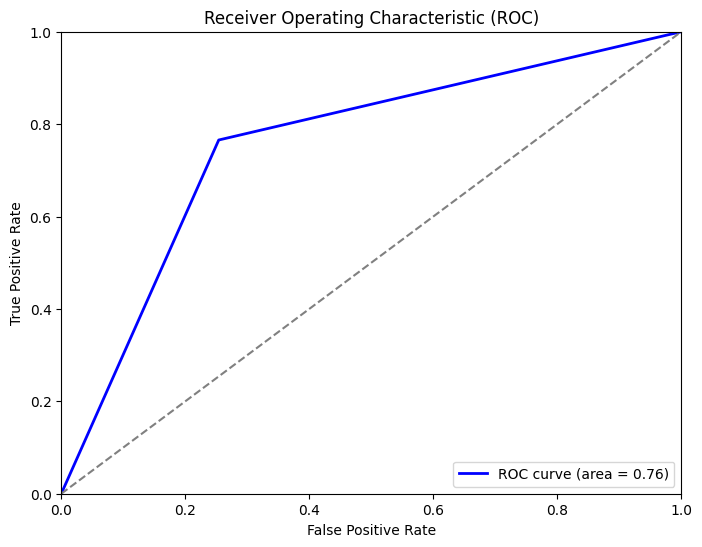

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calcolare le probabilità delle classi per i dati di test
y_pred_prob = y_pred

# Calcolare la curva ROC per la classe positiva (indice 1)
fpr, tpr, thresholds = roc_curve(y_test_first, y_pred_first)

# Calcolare l'area sotto la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Plot della curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [40]:
# Imposta i limiti per il numero di livelli nascosti e il numero di neuroni in ogni livello
num_hidden_layers_min = 1
num_hidden_layers_max = 4
num_neurons_min = 22
num_neurons_max = 100
best_accuracy = 0
best_params = ""

# Esegui la ricerca casuale
for i in range(100):
    neurons = []
    # Genera un numero casuale di livelli nascosti
    num_hidden_layers = np.random.randint(num_hidden_layers_min, num_hidden_layers_max + 1)

    # Crea la rete neurale
    model = Sequential()

    # Aggiungi il livello di input
    num_neurons = np.random.randint(num_neurons_min, num_neurons_max + 1)
    model.add(Dense(num_neurons, input_dim=X_train.shape[1], activation='relu'))
    neurons.append(num_neurons)

    # Aggiungi i livelli nascosti
    for _ in range(num_hidden_layers):
        # Genera un numero casuale di neuroni per questo livello nascosto
        num_neurons = np.random.randint(num_neurons_min, num_neurons_max + 1)
        model.add(Dense(num_neurons, activation='relu'))
        neurons.append(num_neurons)

    # Aggiungi il livello di output
    model.add(Dense(2, activation='softmax'))

    # Compila la rete neurale
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.01))

    # Addestra la rete neurale
    model.fit(X_train, y_train, epochs=30, batch_size=3, verbose=0)

    y_pred = model.predict(X_test)
    y_pred = correctValue(y_pred)

    # Calcola l'errore di previsione sulla parte di dati di test
    mse = np.mean((y_test - y_pred) ** 2)

    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
      best_accuracy = accuracy
      best_params = "Migliori parametri: livelli nascosti = ", num_hidden_layers, ", neuroni = ", neurons, ", accuratezza = ", best_accuracy

    # Stampa i risultati
    print(f'Esempio {i+1}: {num_hidden_layers} livelli, {neurons} neuroni, MSE={mse:.2f},  accuracy={accuracy}')

print(best_params)

4/4 [==============================] - 0s 3ms/step
Esempio 1: 4 livelli, [66, 51, 46, 73, 97] neuroni, MSE=0.50,  accuracy=0.5039370078740157
4/4 [==============================] - 0s 3ms/step
Esempio 2: 4 livelli, [26, 81, 48, 60, 24] neuroni, MSE=0.31,  accuracy=0.6929133858267716
4/4 [==============================] - 0s 4ms/step
Esempio 3: 4 livelli, [49, 89, 93, 39, 97] neuroni, MSE=0.33,  accuracy=0.6692913385826772
4/4 [==============================] - 0s 4ms/step
Esempio 4: 3 livelli, [41, 76, 88, 71] neuroni, MSE=0.31,  accuracy=0.6929133858267716
4/4 [==============================] - 0s 3ms/step
Esempio 5: 1 livelli, [81, 61] neuroni, MSE=0.35,  accuracy=0.6535433070866141
4/4 [==============================] - 0s 3ms/step
Esempio 6: 2 livelli, [78, 32, 92] neuroni, MSE=0.33,  accuracy=0.6692913385826772
4/4 [==============================] - 0s 3ms/step
Esempio 7: 4 livelli, [73, 43, 31, 71, 64] neuroni, MSE=0.34,  accuracy=0.6614173228346457
4/4 [=========================

In [31]:
model = Sequential()
model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(65, activation="relu"))
model.add(Dense(60, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(2, activation='Softmax'))  # Per problemi di classificazione binaria
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

In [36]:
model.fit(X_train, y_train, epochs=30, batch_size=30, verbose=0)

In [37]:
y_pred = model.predict(X_test)
y_pred = correctValue(y_pred)
y_pred_first = firstValue(y_pred)

4/4 [==============================] - 0s 3ms/step


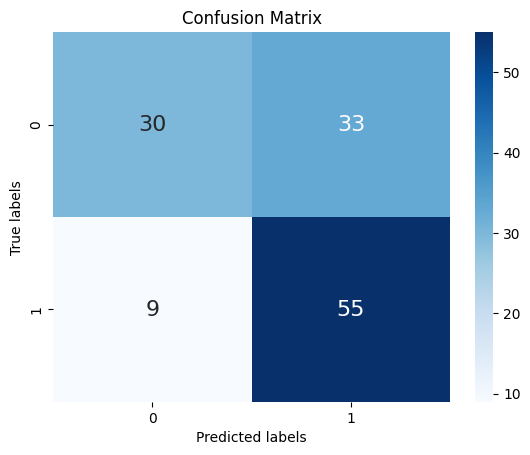

In [38]:
conf_matrix = confusion_matrix(y_test_first, y_pred_first, labels=None, sample_weight=None)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()